In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np

In [3]:

df=pd.read_csv(r"C:\Users\AMON\Downloads\stock prediction.zip")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [5]:
print(df.dtypes)

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object


In [6]:
#cleaning the data 
df['open'] = df['open'].fillna(df['open'].mean)
df['high']=df['high'].fillna(df['high'].mean)
df['low']=df['low'].fillna(df['low'].mean)

In [7]:
X=df.drop(['close','date'],axis=1)
y=df['close']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("training data",X_train.shape)
print("testing data",X_test.shape)

training data (495232, 5)
testing data (123808, 5)


In [10]:
# evaluating the model
m=model.predict(X_test) 
print("MEA",mean_absolute_error(y_test,m))
print("R2 scorre",r2_score(y_test,m))

MEA 1.6363893481206326
R2 scorre 0.9694303456275213


In [9]:
X_train=X_train.apply(pd.to_numeric,errors='coerce')

In [10]:
# creating the model
model= XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [12]:
X_test=X_test.apply(pd.to_numeric,errors='coerce')

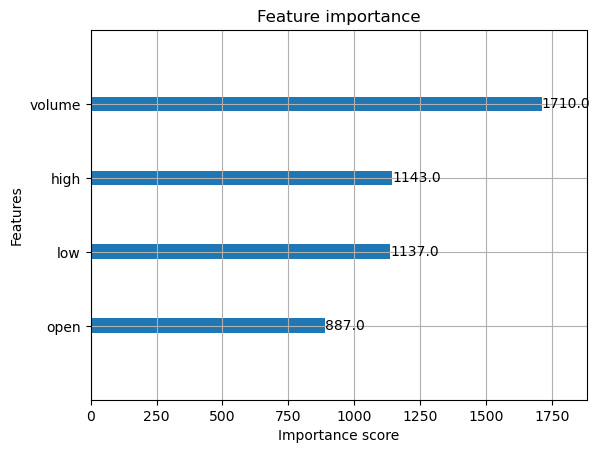

In [3]:
# featureimportance
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV
# defining the parameter grid
param_grid={
    'n_estimators':[50,100,200], # number of trees for better accuracy but slower 
    'max_depth':[3,5,7], # how deep each tree can grow
    'learning_rate':[0.01,0.1,0.2] # how many each tree correct the error
    
}

grid=GridSearchCV(XGBRegressor(random_state=42),param_grid,
scoring='neg_mean_absolute_error',# lowers MAE is better
                  cv=3) # uses 3- folds cross-validation
grid.fit(X_train,y_train)
print("best parametes:",grid.best_params_)

best parametes: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [14]:

import joblib
joblib.dump(model,'stock_price_model.pkl') # save the model to a file

['stock_price_model.pkl']

In [12]:
%store df
%store X_train
%store  X_test
%store y_train
%store  y_test
%store model
%store mean_absolute_error
%store r2_score
%store GridSearchCV

Stored 'df' (DataFrame)
Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
Stored 'model' (XGBRegressor)
Stored 'mean_absolute_error' (function)
Stored 'r2_score' (function)
Stored 'GridSearchCV' (ABCMeta)


In [13]:
%store -r df
%store -r X_train
%store  -r X_test
%store  -r y_train
%store -r  y_test
%store -r model
%store -r mean_absolute_error
%store -r r2_score
%store -r GridSearchCV